# Module 3:  Clustering

## Python Packages and helpful functions

Please download the neccessary files and load the required libraries.


In [ ]:
!wget -nc https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/module3/cigar.csv
!wget -nc https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/module3/easy.csv
!wget -nc https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/module3/messy.csv
!wget -nc https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/LST_Functions.py

import numpy
from numpy import genfromtxt
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from LST_Functions import plot_scatter, annotate_distances, kmeans_cluster_vis

Downloading...
From: https://drive.google.com/uc?id=1J5_N8m9VYMQbsx29dKb-BiNCPG_Px3uO
To: /content/cigar.csv
100% 10.4k/10.4k [00:00<00:00, 4.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=15dyFAHyUzAj_Zs97mlF_VuIrgZkta2GT
To: /content/easy.csv
100% 7.70k/7.70k [00:00<00:00, 23.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1iAGWW8yLRiYvxNqhKVNgI7HjAEsTKkoH
From (redirected): https://drive.google.com/uc?id=1iAGWW8yLRiYvxNqhKVNgI7HjAEsTKkoH&confirm=t&uuid=56e71a9b-8f59-4587-a464-b4f2ba371cac
To: /content/LST_Functions.py
100% 15.4k/15.4k [00:00<00:00, 30.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TPD4LGSTVdD5ON6id4-CbSfS6ocWXMvT
To: /content/messy.csv
100% 15.5k/15.5k [00:00<00:00, 40.1MB/s]


## Clustering
---

Clustering is the process of grouping a set of data objects into multiple groups or clusters so that objects within a cluster have high similarity. It is used as a method to see if natural groupings are present in the data. If these groupings do emerge, these may be named and their properties summarized. All the different clustering methods can produce a partitioning of the dataset. However, different methods will often yield different groupings since each implicitly imposes a structure on the data.

### 1.  Hierarchical clustering

Hierarchical clustering groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters, but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level. This allows you to decide the level or scale of clustering that is most appropriate for your application.

Hierarchical clustering is based on three major steps:

1. Finding the similarity or dissimilarity between every pair of objects in the data set.  In this step, you calculate the distance between objects.

2. Grouping the objects into a binary, hierarchical cluster tree (dendrogram).  In this step, you link pairs of objects that are in close proximity (have a high similarity) using different linkage methods. The linkage method uses the distance information generated in step 1 to determine the similarity of objects to each other. As objects are paired into binary clusters, the newly formed clusters are grouped into larger clusters until a hierarchical tree is formed

3. Determine where to cut the hierarchical tree into clusters. In this step the obtained dendrogram is analyzed in order to decide which cutting level best suits the data.

### 1.1 Similarity-Dissimilarity

A similarity measure for two objects, i and j will be large when the objects are very similar. On the other hand, a dissimilarity measure will be large when the two objects are very dissimilar and small when they are similar, just like a distance measure between objects. Several distance measures are commonly used for computing the dissimilarity of objects described by numeric attributes.  Below we describe some examples.


Let $i = (x_{i1}, x_{i2}, \dots, x_{in})$ and $j = (x_{j1}, x_{j2}, \dots, x_{jn})$ be two objects described by $n$ numeric attributes.

*   The **Euclidean** distance between the two objects is defined as:
$$d(i, j) = \sqrt{
  (x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + \dots + (x_{in} - x_{jn})^2
  }$$

*   The **Manhattan** distance is defined as:
$$ d(i, j) = |x_{i1} - x_{j1}| + |x_{i2} - x_{j2}| + \dots + |x_{in} - x_{jn}| $$

*   To base a distance measure on the **correlation** between the objects, we need to convert the similarity measure into a dissimilarity measure (by negation):
$$d(i, j) = 1 - (|x_{i1} * x_{j1}| + |x_{i2} * x_{j2}| + \dots + |x_{in} * x_{jn}|)$$

The module to calculate distances between objects from the Scientific Python (scipy) package is distance. The distance module contains many distance functions which return the distances between two points.

### Exercise 1.

Given x1 and x2 in the figure below, what is the Euclidean Distance between x1 and x2?

Given x1 and x2 in the figure below, what is the Manhattan Distance between x1 and x2?

<img src="https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/module3/img/ex1.png" width="500"/>

<pre>
a) 3.61		b) 25		c) 5		d)3.1		e)4.8
</pre>

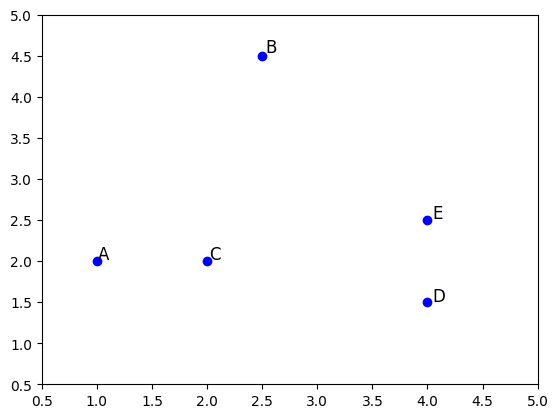

In [ ]:
#Make a small data matrix
data = numpy.array([[1,2],[2.5,4.5],[2,2],[4,1.5],[4,2.5]])
labels = ['A','B','C','D','E']
# Plot to screen
plot_scatter(data, labels)

### Exercise 2.

What are the pairwise Euclidean distances  between all objects of the toy data set from above? To help you to identify the exact distances between two objects  you can make use of the function `annotate_distances` from LST_Functions.py.

### Exercise 3.

On paper, build the dendrogram of the hierarchical clustering tree of the 5 data points using average linkage. Make sure to add the height of the bridges on the y-axis.


## Building the dendrogram - Linkage methods

Once the dissimilarity between objects in the data set has been computed, you can determine how objects in the data set should be grouped into clusters by choosing one of the linkage methods. The function `linkage` of the module hierarchy that you imported before takes the distance information generated by `pdist` and links pairs of objects that are close together into binary clusters. The `linkage` function then links these newly formed clusters to each other and to other objects to create bigger clusters until all objects in the original data set are linked together in a hierarchical tree.


### Exercise 4.

Please fill in the missing parts (???) in the following code snippets and make use of the distances you've calculated earlier. Inspect the dendrograms. Can you reconstruct the distances between the data points from the dendrograms?

### 1.2.1 Single link method

The distance between two groups is defined as the distance between their two closest membe



In [ ]:
??? = hierarchy.linkage(???, 'single')
dn = hierarchy.dendrogram(???,labels=labels,color_threshold=0)


SyntaxError: invalid syntax (<ipython-input-3-75891752648e>, line 2)

### 1.2.2 Complete link method

This method defines the distance between two groups as the distance between their two farthest-apart members. This method usually yields clusters that are well separated and compact.


In [ ]:
??? = hierarchy.linkage(???, 'complete')
dn = hierarchy.dendrogram(???,labels=labels,color_threshold=0)

### 1.2.3 Average link method

This algorithm defines the distance between groups as the average distance between each of the members, weighted so that the two groups have an equal influence on the final result.


In [ ]:
??? = hierarchy.linkage(???, 'average')
dn = hierarchy.dendrogram(???,labels=labels,color_threshold=0)

### Exercise 5.

Suppose you want to group the objects of the toy example into 2 clusters. Depending on the linkage methods you use, how are the objects grouped?

| Linkage  | Answer     | cluster 1             | cluster 2       |
|----------|------------|-----------------------|-----------------|
| Single   | a)         | A C D E               | B               |
|          | b)         | A B                   |      C D E      |
|          | c)         | A C                   |      D E        |  
| Complete | a)         | B C D                 | A E             |
|          | b)         | A C D E               |      B          |
|          | c)         | A C B                 |      D E        |
| Average  | a)         | A C                   | B D E           |
|          | b)         | A C D E               |      B          |
|          | c)         | A C                   |      B D E      |


Hierarchical clustering produces a dendrogram. To give the desired number of clusters, the tree can be cut at a desired horizontal level. The number of vertical stems of the dendrogram intersected by a horizontal line at the desired level, corresponds to the number of clusters.

Load the cigar dataset and cluster by means of euclidean distance and complete linkage.

### Exercise 6.

Fill in the missing parts of the code  and view the dendrogram. What is the optimal number of clusters (based on your visual inspection of the dendrogram)?

<pre>
a) 2		b) 10		c) 3
</pre>


In [ ]:
??? = genfromtxt('cigar.csv', delimiter=',')
plot_scatter(???)
??? #distance calculations
??? #linkage creation
dn = hierarchy.dendrogram(???,color_threshold=0)

### Exercise 7.

How many clusters do you obtain if you cut the dendrogram at 4 ? (Hint: You can play around with the color_threshold parameter)

<pre>
a) 2	        b) 6	     c) 3	       d) 4		  e) 5
</pre>

### Exercise 8.

When you cut the dendrogram at 7, you will obtain 2 clusters. What is the complete linkage distances between both clusters.

<pre>
a) 9.5	  	b) 8	  	c) 6	  	d) 7		  e) 7.8
</pre>

### Hierarchical clustering of the "Messy data"

Load the messy data set: "messy.csv". This is not a real gene expression matrix, but simply a data set of 300 points in a two dimensional space, e.g. the measurements of 300 genes using two microarrays. The purpose of this exercise is to get you acquainted with clustering gain insight in the different parameters that you can set.

In [ ]:
messy = genfromtxt('messy.csv', delimiter=',')
plot_scatter(messy)

This plot visualizes 300 genes as 300 dots. In this 2D scatterplot, the X-axis (horizontal) indicates the first measurement and the Y-axis (vertical) indicates the second measurement.

### Exercise 9.

The *messy* dataset shows two noisy clusters that are almost overlapping. Which linkage works best to obtain the two underlying noisy clusters?

<pre>
a) single		b) complete		c) average
</pre>

### Exercise 10.

Using complete linkage, if you cut the euclidean distance dendogram at 1.5. How many clusters do you obtain?

<pre>
a) 3	     	b) 4		       c) 5		d) 8
</pre>


## K-means clustering

k­means clustering is a partitioning method. This method partitions data into k mutually exclusive clusters, and returns the index of the cluster to which it has assigned each observation. Unlike hierarchical clustering, k­means clustering operates on actual observations (rather than the larger set of dissimilarity measures), and creates a single level of clusters. The Hierarchic clustering method starts from the bottom, and combines observations to clusters. At higher levels it can only fuse existing clusters to others, but it cannot break old groups to build better ones.

### K-means Algorithm

The k-means algorithm defines the centroid of a cluster as the mean value of the points within the cluster. First, it randomly selects k of the objects in the dataset, each of which initially represents a cluster mean or center. For each of the remaining objects, an object is assigned to the cluster to which it is most similar, based on the Euclidean distance between the object and the cluster mean. The k-mean algorithm then iteratively improves the within-cluster variation. For each cluster, it computes the new mean using the objects assigned to the cluster in the previews iteration. All the objects are then reassigned using the updated means as the new cluster centers. The iterations continue until the assignment is stable, that is the clusters formed in the current round are the same as those formed in the previous round.  

k: the number of clusters

D: a dataset containing n objects

1. arbitrarily choose k objects from D as the initial cluster centers;
2. repeat
3. (re)assign each object to the cluster to which the object is the most similar,   based on the mean value of the objects in the cluster;
4. update the cluster means;
5. until no change;

The k-means method is not guaranteed to converge to the global optimum and often terminates at a local optimum. The results may depend on the initial random selection of cluster centers. To obtain good results in practice, it is common to run the k-mean algorithm multiple times with different initial cluster centers.

The k-means method can be applied only when the mean of a set of objects is defined.

### K-means in Python
Load the cigar and messy datasets and visualize them.  

In [ ]:
cigar = genfromtxt('cigar.csv', delimiter=',')
messy = genfromtxt('messy.csv', delimiter=',')
plot_scatter(cigar)
plot_scatter(messy)


### Exercise 11.

Based on the data plots, what could be a good number of K for each of the data sets?


In Python you can perform k-means clustering via the KMeans class from the sklearn.cluster module. You first have to create a KMeans object and then fit data to it. The fitted KMeans object can then be visualized in a 2 dimensional scatter plot via the kmeans_cluster_vis function which is defined in LST_Functions.py. (hint: The input of kmeans_cluster_vis is explained in its help report)

In [ ]:
k=??? #Number of clusters
kmeans_model = KMeans(n_clusters=k).fit(messy)
kmeans_cluster_vis(messy,kmeans_model.labels_,kmeans_model.cluster_centers_,dimensions=(0,1))

### Exercise 12.

After running the KMeans function a few times, what k would you advice for which data set and why?

### Exercise 13.

Is K-means clustering better suited to one of these datasets, and if so, why?


## Cluster validation: Davies-Bouldin index

The Davies-Bouldin criterion is based on a ratio of within-cluster and between-cluster distances. The Davies-Bouldin index is defined as

where Di,j is the within-to-between cluster distance ratio for the ith and jth clusters.
In mathematical terms,
Di,j=di+djdi,j
di is the avarege distance between each point in the ith cluster and the centroid of the ith cluster.
dj is the avarege distance between each point in the jth cluster and the centroid of the jth cluster.
di,j is the Euclidean distance between the centroids of the ith and jth clusters.
The maximum value of Di,j represents the worst-case within-to-between cluster ratio for cluster i. The optimal clustering solution has the smallest Davies-Bouldin index value.


### Exercise 14.

Load the *easy* data set and evaluate the optimal number of k using the Davies-Bouldin Index and kmeans evaluation criterion. Use cluster numbers of 2 to 6.


In [ ]:
easy = genfromtxt('easy.csv', delimiter=',')
kmeans_model = KMeans(2).fit(easy)
davies_bouldin_score(easy, kmeans_model.labels_)

### Exercise 15.

In your lecture you have learned about the Silhouette score. Do you find the same number of optimal clusters when you use the Silhouette score to evaluate your cluster performances? Use cluster numbers of 2 to 6.

### Exercise 16.

What is the difference and purpose of the "silhouette_score" and "silhouette_samples" functions?